# Code Along (structure): 1 Sample t-test

# I. Manual approach

## 1.&nbsp; Initial question.

Remember our initial research question:

Is the mean of our sample smaller than 1kg due to chance ($H_0$), or because the population of squirrels from which we took the sample has, in fact, a different mean than 1kg ($H_1$)?



## 2.&nbsp; Central Limit Theorem.

By the Central Limit Theorem: Regardless of the true underlying distribution of the population, if we take multiple samples of a fixed size from that population, and we plot a histogram of all the means of these samples, this will form a normal distribution. 

This distribution is called the **Sampling distribution of the sample means**. It has the following properties:

1) Its mean is equal to the mean of the population (in our case, this is 1).

2) Its standard deviation is equal to the standard error of our estimate.

3) It resembles a normal distribution.

## 3.&nbsp; Sampling distribution of the sample means.

Let's try to generate and plot a sampling distribution of the sample means. For this, we need to know the standard error of of the mean (SEM).

The SEM will tell us how far we should expect the mean of our sample to be away from the true mean of the population.

Read more about the Standard Error of the Mean on page 171 of [OpenIntro Statistics](https://www.openintro.org/book/os/) or on [Wikipedia](https://en.wikipedia.org/wiki/Standard_error).

Generally, it helps to make a clear distinction between:
*   the standard deviation of the population $\sigma$,
*   the standard deviation of the sample s,
*   the standard deviation of the sampling distribution of sample means $\sigma_{\bar {x}}$, which is also called the standard error of the mean,
*   and the estimator of the standard deviation of the sampling distribution of the sample means $s_{\bar {x}}$, which is also often called the standard error.

The SEM is the value in the denominator of our t-score $t = \frac{x – μ} {\frac{s}{\sqrt{n}}}$.

It corresponds to the sample standard deviations divided by the square root of the sample size n: $s_{\bar {x}} = \frac{s}{\sqrt{n}}$.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Here's the weights of all the squirrels in our sample:
squirrels = pd.Series([1.3, 0.47, 1.5, 1.66, 2.43, 1.29, 0.94, 1.06, 1.03, 0.76, 0.6, 0.76, 0.32, 2.2, 1.24, 1.8, 1.66, 0.51, 
                       0.72, 1.62, 0.7, 0.76, 0.9, 0.93, 0.98, 0.42, 0.59, 0.12, 0.95, 0.55, 0.16, 1.25, 0.42, 0.64, 0.66, 
                       1.04, 0.49,0.41, 0.4, 0.81, 0.71, 0.04, 0.6, 2.44, 1.61, 0.13, 2.08, 0.7, 0.61, 0.58, 0.77, 0.67, 1.16, 
                       0.31, 0.3, 0.66, 0.03, 0.54, 0.63, 1.03, 0.73, 2.02])

In [ ]:
# The sample size is commonly denoted as n.
n = len(squirrels)
n

62

In [ ]:
# Let's calculate the SEM.
SEM = np.std(squirrels, ddof=1) / np.sqrt(n)
SEM

0.07296148980027695

The Standard error can also be calculated using scipy.

In [ ]:
from scipy.stats import sem
from scipy.stats import norm

In [ ]:
sem_scipy = sem(squirrels)
sem_scipy

0.07296148980027695

Now we know all the properties of the Sampling distribution of the sample means:

1.   mean = 1
2.   standard deviation = approx. 0.073
3.   normal distribution

This means that we can plot it.

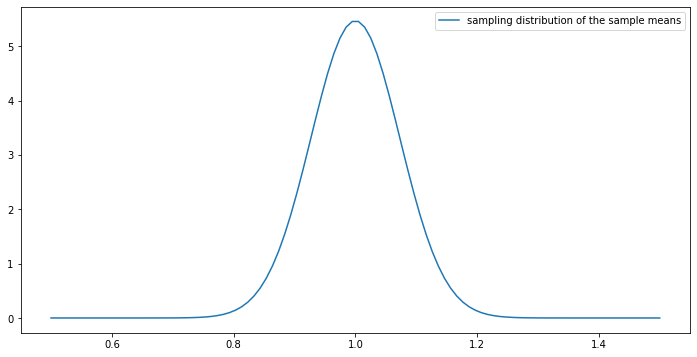

In [ ]:
plt.figure(figsize=(12,6))
xt = np.linspace(0.5,1.5,100)
# Plot a normal distribution with mean 1 and standard deviation ca. 0.073.
plt.plot(xt, norm.pdf(xt, 1, SEM), label="sampling distribution of the sample means")
plt.legend()
plt.show()

From this, we want to deduce the p-value. Therefore, we simulate the sampling distribution of the sample means by taking an increasing number of random samples.

Let's start with just one sample.

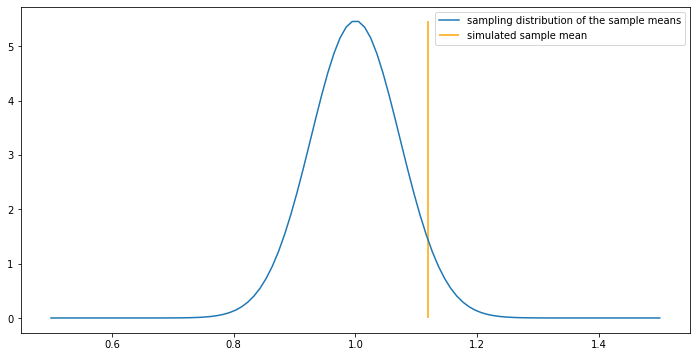

In [ ]:
# Draw one simulated sample from the normal distribution above.
sample_1 = np.random.normal(loc=1, scale=SEM, size=1)

plt.figure(figsize=(12,6))
xt = np.linspace(0.5,1.5,100)
# Plot a normal distribution with mean 1 and standard deviation ca. 0.073.
plt.plot(xt, norm.pdf(xt, 1, SEM), label="sampling distribution of the sample means")
# Add a vertical line for the random sample.
plt.vlines(sample_1, ymin=0, ymax=max(norm.pdf(xt, 1, SEM)), color="orange", label="simulated sample mean")
plt.legend()
plt.show()

Let's do the same for 100 random samples.

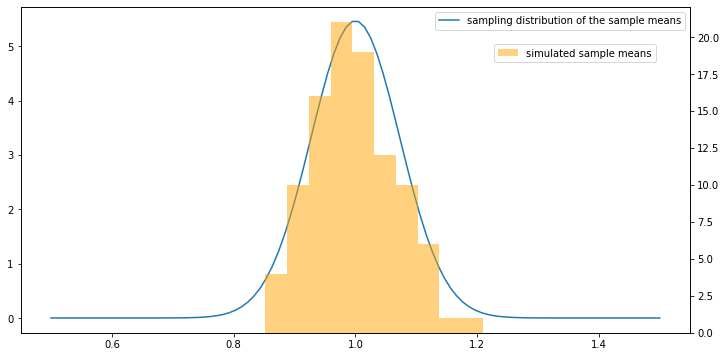

<Figure size 864x432 with 0 Axes>

In [ ]:
sample_100 = np.random.normal(loc=1, scale=SEM, size=100)

fig, ax1 = plt.subplots(figsize=(12,6))
plt.figure(figsize=(12,6))
xt = np.linspace(0.5,1.5,100)
# Plot a normal distribution with mean 1 and standard deviation ca. 0.073.
ax1.plot(xt, norm.pdf(xt, 1, SEM), label="sampling distribution of the sample means")
# Plot a secondary y axis to show the values for the histogram.
ax2 = ax1.twinx()
# Add a histogram for the random samples.
ax2.hist(sample_100, color="orange", alpha=0.5, label="simulated sample means")
ax1.legend()
ax2.legend(bbox_to_anchor=(0.7, 0.9))
plt.show()

Let's try it with 10 000 samples!
We will plot the simulated samples including the values for the population mean, our sample mean and the standard deviation intervals.

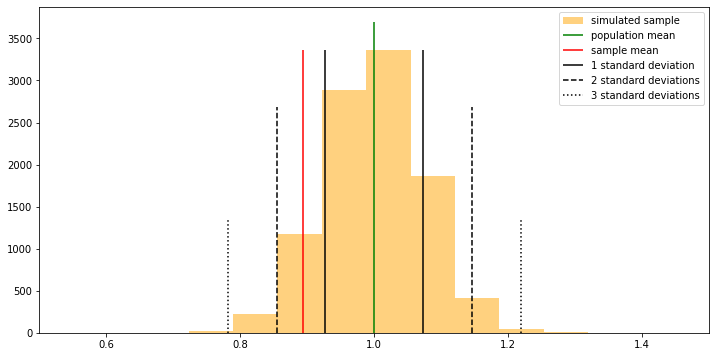

In [ ]:
sample_10000 = np.random.normal(loc=1, scale=SEM, size=10000)
# Plot the simulated samle.
plt.figure(figsize=(12,6))
ys, xs, _ = plt.hist(sample_10000, color="orange", alpha=0.5, label="simulated sample")
plt.xlim(0.5, 1.5)
# Add a vertical line for the population mean.
plt.vlines(1, ymin=0, ymax=max(ys)*1.1, color="green", label="population mean")
# Add a vertical line for the sample mean.
plt.vlines(squirrels.mean(), ymin=0, ymax=max(ys), color="red", label="sample mean")
# Add vertical lines for the standard deviations.
plt.vlines(1-SEM, ymin=0, ymax=max(ys), color="black", label="1 standard deviation")
plt.vlines(1+SEM, ymin=0, ymax=max(ys), color="black")
plt.vlines(1-2*SEM, ymin=0, ymax=max(ys)*0.8, color="black", linestyle="dashed", label="2 standard deviations")
plt.vlines(1+2*SEM, ymin=0, ymax=max(ys)*0.8, color="black", linestyle="dashed")
plt.vlines(1-3*SEM, ymin=0, ymax=max(ys)*0.4, color="black", linestyle="dotted", label="3 standard deviations")
plt.vlines(1+3*SEM, ymin=0, ymax=max(ys)*0.4, color="black", linestyle="dotted")
plt.legend()
plt.show()

The **z-score** tells how many standard deviations $\sigma$ a given value (here: the sample mean x) is away from the mean of a normal distribution (here: the population mean $\mu$).

Let's calculate the z-score for our sample: $z = \frac{x – μ} {\sigma}$

In [ ]:
# x = sample mean
x = squirrels.mean()
x

0.8935483870967743

In [ ]:
# (sample mean - population mean) / standard error of the mean
z_score = (x - 1) / SEM
z_score

-1.459010954883512

Our z-score is `-1.46`. To find the p-value for that score, we can use the **cumulative distribution function** for the normal distribution.

The cumulative distribution function shows for any value on the x-axis the probability that a random variable will take a value less or equal to that value. Let's plot it.

Notice that we use the cumulative distribution function of a normal distribution with mean 0 and standard deviation 1. This is possible because the z-score is measured as the distance from the mean in units of standard deviations. Meaning that by subtracting the mean and dividing by the standard deviation, we "normalized" the initial distribution. This is useful because it is usually more straightforward to handle a standard normal distribution, i.e. with mean 0 and standard deviation 1.

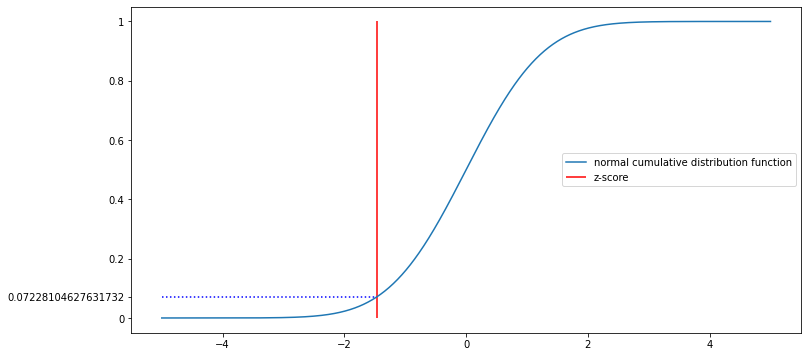

In [ ]:
plt.figure(figsize=(12,6))
xt = np.linspace(-5,5,1000)
# Plot the cumulative distribution function of a standard normal distribution.
plt.plot(xt, norm.cdf(xt, 0, 1), label="normal cumulative distribution function")
# Add a vertical line for the z-score.
plt.vlines(z_score, ymin=0, ymax=1, color="red", label="z-score")
# Add a horizontal line to show the value on the y-axis at the intersection.
plt.hlines(norm.cdf(x = z_score), xmin=min(xt), xmax=z_score, color="blue", linestyle="dotted")
# Set the values on the y-axis to show the value on the y-axis at the intersection.
plt.yticks([0, norm.cdf(x = z_score), 0.2, 0.4, 0.6, 0.8, 1 ],[0, norm.cdf(x = z_score), 0.2, 0.4, 0.6, 0.8, 1 ])
plt.legend(loc="right")
plt.show()

The p-value is equal to twice the value on the y-axis.

In [ ]:
print(f"Value on the y-axis:  {norm.cdf(x = z_score)}")
print(f"P-value: {norm.cdf(x = z_score)*2}")

Value on the y-axis:  0.07228104627631732
P-value: 0.14456209255263464


We can also get the p-value from a t-distribution with n-1 degrees of freedom.

In [ ]:
from scipy.stats import t

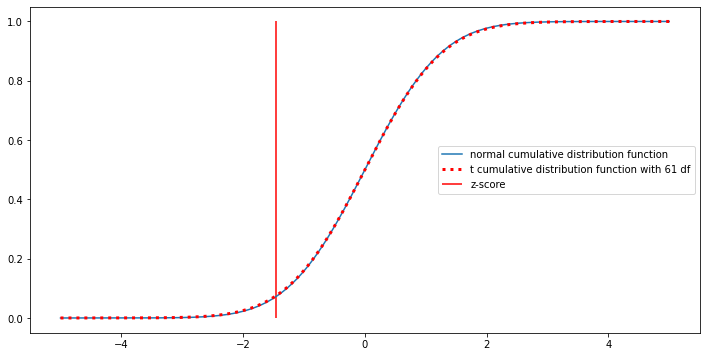

In [ ]:
plt.figure(figsize=(12,6))
xt = np.linspace(-5,5,1000)
# Plot the cumulative distribution function of a standard normal distribution.
plt.plot(xt, norm.cdf(xt, 0, 1), label="normal cumulative distribution function")
# Plot the cumulative distribution function of a t-distribution with 61 degrees of freedom.
plt.plot(xt, t.cdf(xt, 61), lw=3, color="red", linestyle="dotted", label="t cumulative distribution function with 61 df")
# Add a vertical line for the z-score.
plt.vlines(z_score, ymin=0, ymax=1, color="red", label="z-score")
plt.legend(loc="right")
plt.show()

The p-value is equal to twice the value on the y-axis.

In [ ]:
print(f"Value on the y-axis:  {t.cdf(z_score, df=61)}")
print(f"P-value: {t.cdf(z_score, df=61)*2}")

Value on the y-axis:  0.07484626541081206
P-value: 0.14969253082162412


In [ ]:
from scipy.stats import ttest_1samp #another method of p_value#easiest one you can simply use this to know p_value

t_statistic, p_value = ttest_1samp(a = squirrels, 
                                   popmean = 1)
p_value

0.14969253082162412

There is a small difference between the to p-values. Where does it come from?
Let's zoom in.

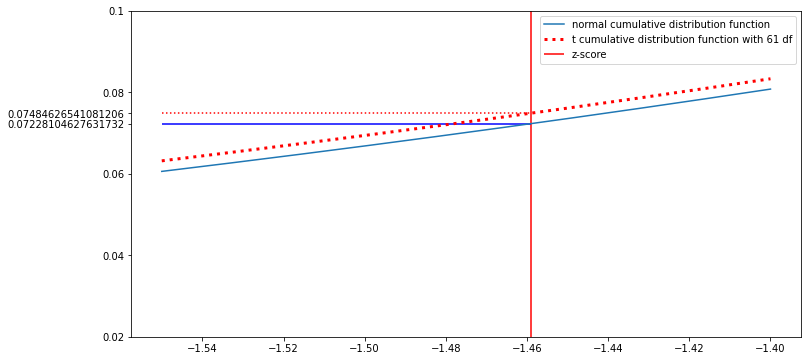

In [ ]:
plt.figure(figsize=(12,6))
xt = np.linspace(-1.55,-1.4,1000)
# Plot the cumulative distribution function of a standard normal distribution.
plt.plot(xt, norm.cdf(xt, 0, 1), label="normal cumulative distribution function")
# Plot the cumulative distribution function of a t-distribution with 61 degrees of freedom.
plt.plot(xt, t.cdf(xt, 61), lw=3, color="red", linestyle="dotted", label="t cumulative distribution function with 61 df")
# Add a vertical line for the z-score.
plt.vlines(z_score, ymin=0, ymax=.1, color="r", label="z-score")
plt.hlines(norm.cdf(x = z_score), xmin=min(xt), xmax=z_score, color="blue")
plt.hlines(t.cdf(z_score, 61), xmin=min(xt), xmax=z_score, color="red", linestyle="dotted")
plt.ylim(0.02, 0.1)
plt.yticks([0.02, 0.04, 0.06, norm.cdf(x = z_score), t.cdf(z_score, df=61), 0.08, 0.1 ],[0.02, 0.04, 0.06, norm.cdf(x = z_score), t.cdf(z_score, df=61), 0.08, 0.1 ])
plt.legend()
plt.show()

# III. Exercise 1


Our research partner collected sample weights from a neighbouring population of squirrels.

In [ ]:
squirrels_2 = pd.Series([0.7 , 1.13, 0.64, 1.02, 1.19, 0.84, 0.67, 1.06, 0.74,
                         0.74, 1.07, 1.08, 1.02, 0.86, 0.76, 1.06, 0.81, 1.23,
                         1.06, 0.82, 1.09, 1.04, 1.06, 0.86, 1.27, 0.82, 0.54,
                         0.68, 1.11, 0.72, 0.73, 0.6 , 0.94, 1.26, 0.94, 1.19,
                         1.03, 1.01, 0.85, 0.59, 0.88, 0.49, 1.06, 0.76, 1.14,
                         0.47, 0.63, 0.92, 0.65, 1.42, 1.12, 1.03, 0.71])

In [ ]:
# What are the null and alternative hypotheses?
#H0=1kg (null hypothesis) h1><1 kg (alternate hypothesis)

In [ ]:
# Find the p-value.
n=len(squirrels_2)
n
# Your code here.

53

In [ ]:
from scipy.stats import sem
from scipy.stats import norm

In [ ]:
sem_sci = sem(squirrels_2)
sem_sci

0.03052829650467031

In [ ]:
mean=squirrels_2.mean()
mean

0.9077358490566036

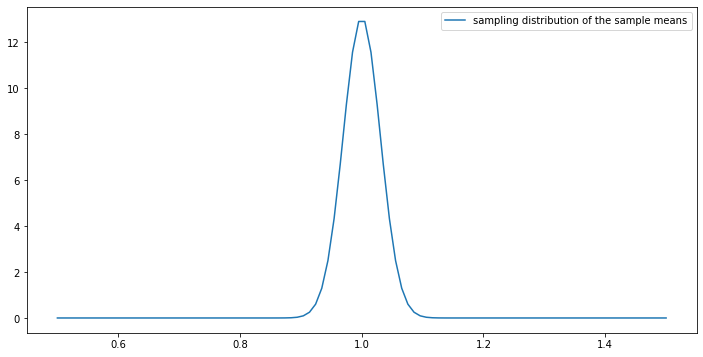

In [ ]:
plt.figure(figsize=(12,6))
xt = np.linspace(0.5,1.5,100)
# Plot a normal distribution with mean 1 and standard deviation ca. 0.073.
plt.plot(xt, norm.pdf(xt, 1, sem_sci), label="sampling distribution of the sample means")
plt.legend()
plt.show()

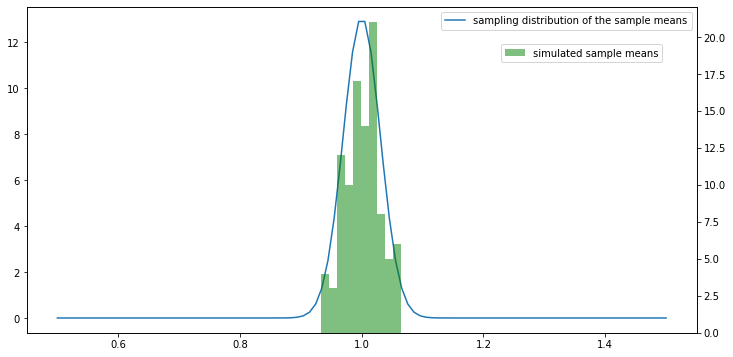

<Figure size 864x432 with 0 Axes>

In [ ]:
sample_100 = np.random.normal(loc=1, scale=sem_sci, size=100)

fig, ax1 = plt.subplots(figsize=(12,6))
plt.figure(figsize=(12,6))
xt = np.linspace(0.5,1.5,100)
# Plot a normal distribution with mean 1 and standard deviation ca. 0.073.
ax1.plot(xt, norm.pdf(xt, 1, sem_sci), label="sampling distribution of the sample means")
# Plot a secondary y axis to show the values for the histogram.
ax2 = ax1.twinx()
# Add a histogram for the random samples.
ax2.hist(sample_100, color="green", alpha=0.5, label="simulated sample means")
ax1.legend()
ax2.legend(bbox_to_anchor=(0.7, 0.9))
plt.show()

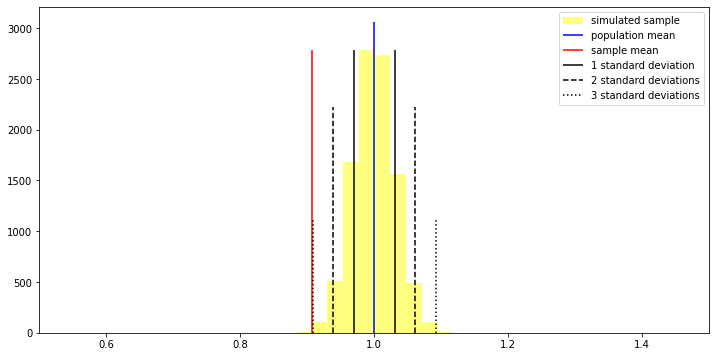

In [ ]:
sample_10000 = np.random.normal(loc=1, scale=sem_sci, size=10000)
# Plot the simulated samle.
plt.figure(figsize=(12,6))
ys, xs, _ = plt.hist(sample_10000, color="yellow", alpha=0.5, label="simulated sample")
plt.xlim(0.5, 1.5)
# Add a vertical line for the population mean.
plt.vlines(1, ymin=0, ymax=max(ys)*1.1, color="blue", label="population mean")
# Add a vertical line for the sample mean.
plt.vlines(squirrels_2.mean(), ymin=0, ymax=max(ys), color="red", label="sample mean")
# Add vertical lines for the standard deviations.
plt.vlines(1-sem_sci, ymin=0, ymax=max(ys), color="black", label="1 standard deviation")
plt.vlines(1+sem_sci, ymin=0, ymax=max(ys), color="black")
plt.vlines(1-2*sem_sci, ymin=0, ymax=max(ys)*0.8, color="black", linestyle="dashed", label="2 standard deviations")
plt.vlines(1+2*sem_sci, ymin=0, ymax=max(ys)*0.8, color="black", linestyle="dashed")
plt.vlines(1-3*sem_sci, ymin=0, ymax=max(ys)*0.4, color="black", linestyle="dotted", label="3 standard deviations")
plt.vlines(1+3*sem_sci, ymin=0, ymax=max(ys)*0.4, color="black", linestyle="dotted")
plt.legend()
plt.show()

In [ ]:
z_score2 = (mean - 1) / sem_sci
z_score2

-3.0222502237975024

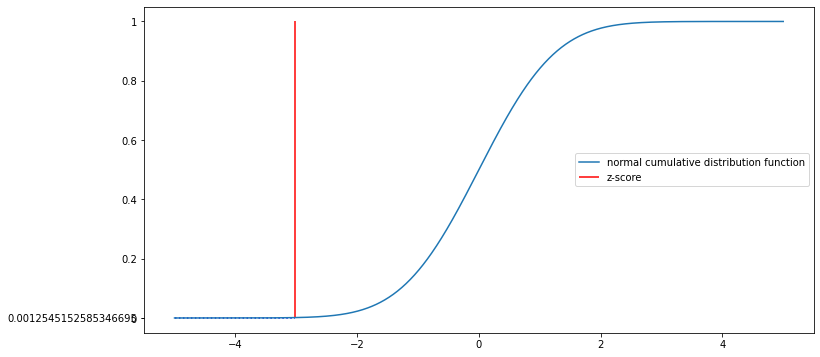

In [ ]:
plt.figure(figsize=(12,6))
xt = np.linspace(-5,5,1000)
# Plot the cumulative distribution function of a standard normal distribution.
plt.plot(xt, norm.cdf(xt, 0, 1), label="normal cumulative distribution function")
# Add a vertical line for the z-score.
plt.vlines(z_score2, ymin=0, ymax=1, color="red", label="z-score")
# Add a horizontal line to show the value on the y-axis at the intersection.
plt.hlines(norm.cdf(x = z_score2), xmin=min(xt), xmax=z_score2, color="blue", linestyle="dotted")
# Set the values on the y-axis to show the value on the y-axis at the intersection.
plt.yticks([0, norm.cdf(x = z_score2), 0.2, 0.4, 0.6, 0.8, 1 ],[0, norm.cdf(x = z_score2), 0.2, 0.4, 0.6, 0.8, 1 ])
plt.legend(loc="right")
plt.show()

In [ ]:
print(f"Value on the y-axis:  {t.cdf(z_score2, df=61)}")
print(f"P-value: {t.cdf(z_score2, df=61)*2}")

Value on the y-axis:  0.0018323639347528002
P-value: 0.0036647278695056003


In [ ]:
from scipy.stats import ttest_1samp #another method of p_value#easiest one you can simply use this to know p_value

t_statistic, p_value = ttest_1samp(a = squirrels_2, 
                                   popmean = 1)
p_value

0.0038879065694233284

In [ ]:
alpha=0.01

In [ ]:
# Your code here.
if p_value > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is smaller than alpha.


# IV. Exercise 2

Suspecting that WBSCS are smarter than the general population, you designed an experiment and randomly sampled 45 WBS CODING SCHOOL students, who took an IQ test and their result was 130. The average IQ is 100. Test whether or not WBSCS students are different from the regular population.

In [ ]:
wbs_students = pd.Series([172, 155, 144, 112, 79, 132, 126, 184, 145, 155, 65, 73, 
 56, 156, 117, 213, 143, 86, 86, 197, 54, 195, 186, 108, 
 76, 191, 54, 115, 106, 173, 91, 95, 144, 94, 135, 116, 
 182, 144, 127, 216, 71, 200, 182, 71, 129])

In [ ]:
# What are the null and alternative hypotheses?
#not WBSCS students are different from the regular population(H0)
#WBSCS students are different from the regular population(H1)
# What would you choose as your confidence level if you were in charge of designing this experiment?

In [ ]:
mean_wbs= wbs_students.mean()
mean_wbs

130.0222222222222

In [ ]:
sem_wbs=(wbs_students.std()/np.sqrt(len(wbs_students)))
sem_wbs

6.982119218164026

In [ ]:
from scipy.stats import sem
from scipy.stats import norm

In [ ]:
sem_wbs = sem(wbs_students)
sem_wbs

6.982119218164026

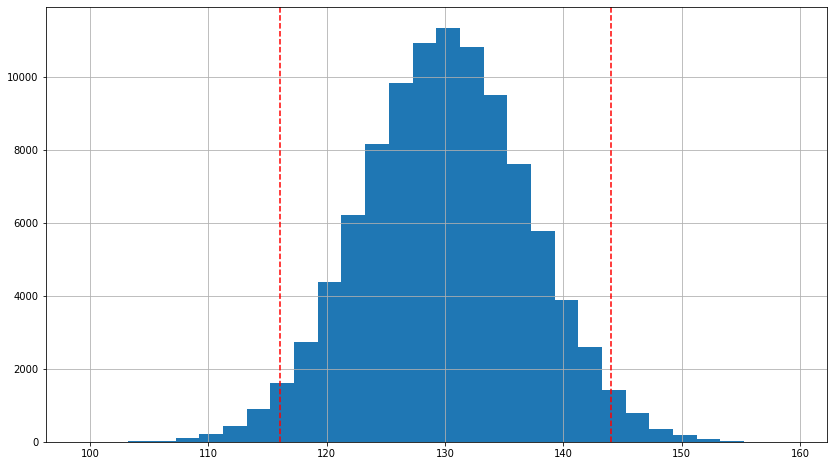

In [ ]:
# generating a normal distribution
sampling_dist_wbs = stats.norm.rvs(loc=mean_wbs, # The mean of the sample.
                                         scale=sem_wbs, # An estimation of the standard error.
                                         size=100000,
                                         random_state=123
                                         )
norm_dist = pd.Series(sampling_dist_wbs)
norm_dist.hist(bins=30, figsize=(14, 8))
plt.axvline(mean_wbs-sem_wbs*2, color = 'r', linestyle="--")
plt.axvline(mean_wbs+sem_wbs*2, color = 'r', linestyle="--");

In [ ]:
# using scipy to calculate the confidence interval:
stats.norm.interval(alpha=0.95, # the confidence level
                 loc=np.mean(wbs_students), # mean of our sample
                 scale=stats.sem(wbs_students)) # standard error of the mean

# if you want the results to match with the manual calculation above,

(116.33752001885576, 143.70692442558865)

In [ ]:
# upper bound of the confidence interval
np.mean(wbs_students) + stats.sem(wbs_students)*2

143.98646065855027

In [ ]:
# lower bound of the confidence interval
np.mean(wbs_students) - stats.sem(wbs_students)*2

116.05798378589415

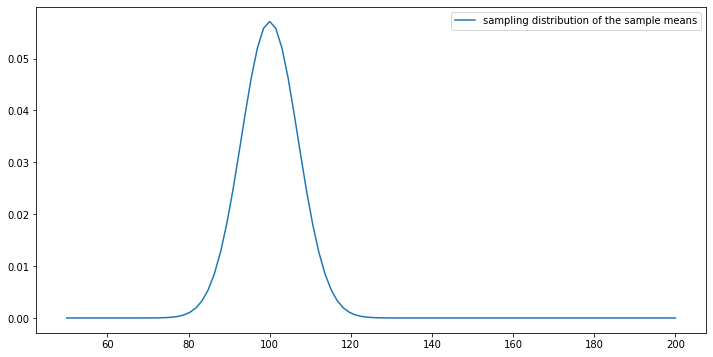

In [ ]:
plt.figure(figsize=(12,6))
xt = np.linspace(50,200,100)
# Plot a normal distribution with mean 100 and standard deviation+
plt.plot(xt, norm.pdf(xt, 100, sem_wbs), label="sampling distribution of the sample means")
plt.legend()
plt.show()

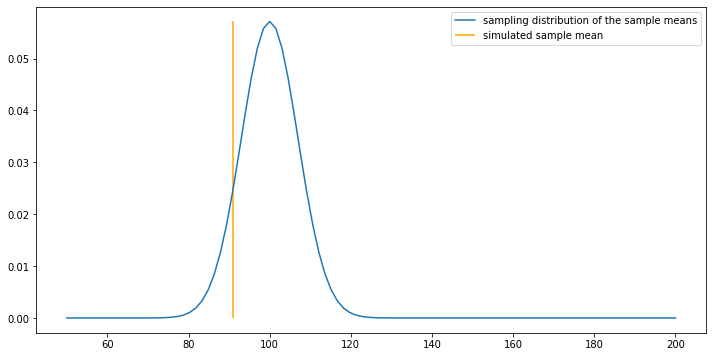

In [ ]:
# Draw one simulated sample from the normal distribution above.
sample_1 = np.random.normal(loc=100, scale=sem_wbs, size=1)

plt.figure(figsize=(12,6))
xt = np.linspace(50,200,100)
# Plot a normal distribution with mean 1 and standard deviation ca. 0.073.
plt.plot(xt, norm.pdf(xt, 100, sem_wbs), label="sampling distribution of the sample means")
# Add a vertical line for the random sample.
plt.vlines(sample_1, ymin=0, ymax=max(norm.pdf(xt, 100,sem_wbs)), color="orange", label="simulated sample mean")
plt.legend()
plt.show()

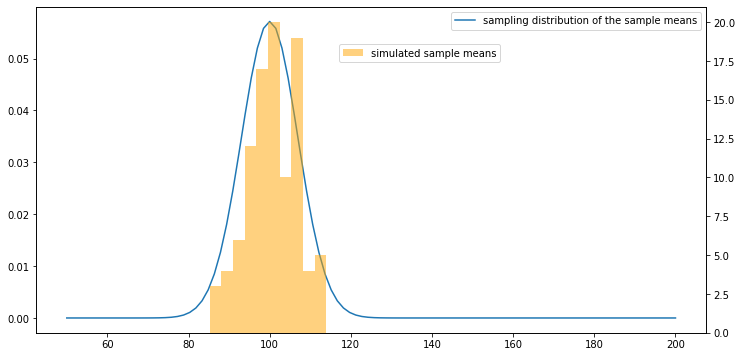

<Figure size 864x432 with 0 Axes>

In [ ]:
sample_100 = np.random.normal(loc=100, scale=sem_wbs, size=100)

fig, ax1 = plt.subplots(figsize=(12,6))
plt.figure(figsize=(12,6))
xt = np.linspace(50,200,100)
# Plot a normal distribution with mean 1 and standard deviation ca. 0.073.
ax1.plot(xt, norm.pdf(xt, 100, sem_wbs), label="sampling distribution of the sample means")
# Plot a secondary y axis to show the values for the histogram.
ax2 = ax1.twinx()
# Add a histogram for the random samples.
ax2.hist(sample_100, color="orange", alpha=0.5, label="simulated sample means")
ax1.legend()
ax2.legend(bbox_to_anchor=(0.7, 0.9))
plt.show()

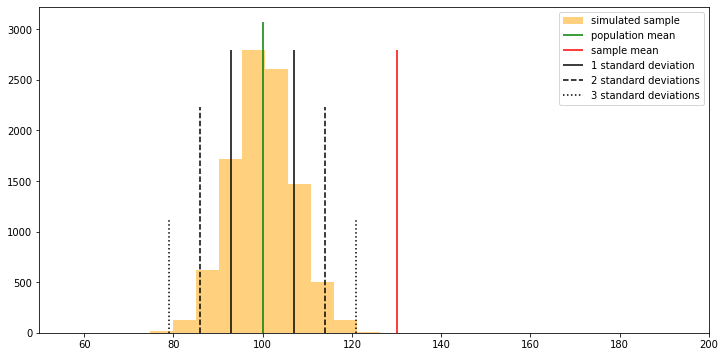

In [ ]:
sample_10000 = np.random.normal(loc=100, scale=sem_wbs, size=10000)
# Plot the simulated samle.
plt.figure(figsize=(12,6))
ys, xs, _ = plt.hist(sample_10000, color="orange", alpha=0.5, label="simulated sample")
plt.xlim(50, 200)
# Add a vertical line for the population mean.
plt.vlines(100, ymin=0, ymax=max(ys)*1.1, color="green", label="population mean")
# Add a vertical line for the sample mean.
plt.vlines(wbs_students.mean(), ymin=0, ymax=max(ys), color="red", label="sample mean")
# Add vertical lines for the standard deviations.
plt.vlines(100-sem_wbs, ymin=0, ymax=max(ys), color="black", label="1 standard deviation")
plt.vlines(100+sem_wbs, ymin=0, ymax=max(ys), color="black")
plt.vlines(100-2*sem_wbs, ymin=0, ymax=max(ys)*0.8, color="black", linestyle="dashed", label="2 standard deviations")
plt.vlines(100+2*sem_wbs, ymin=0, ymax=max(ys)*0.8, color="black", linestyle="dashed")
plt.vlines(100-3*sem_wbs, ymin=0, ymax=max(ys)*0.4, color="black", linestyle="dotted", label="3 standard deviations")
plt.vlines(100+3*sem_wbs, ymin=0, ymax=max(ys)*0.4, color="black", linestyle="dotted")
plt.legend()
plt.show()

In [ ]:
z_score3 = ( mean_wbs - 100) / sem_wbs
z_score3

4.2998724719737265

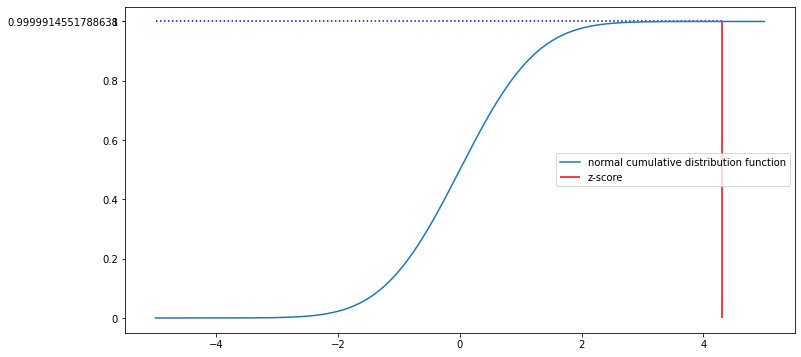

In [ ]:
plt.figure(figsize=(12,6))
xt = np.linspace(-5,5,1000)
# Plot the cumulative distribution function of a standard normal distribution.
plt.plot(xt, norm.cdf(xt, 0, 1), label="normal cumulative distribution function")
# Add a vertical line for the z-score.
plt.vlines(z_score3, ymin=0, ymax=1, color="red", label="z-score")
# Add a horizontal line to show the value on the y-axis at the intersection.
plt.hlines(norm.cdf(x = z_score3), xmin=min(xt), xmax=z_score3, color="blue", linestyle="dotted")
# Set the values on the y-axis to show the value on the y-axis at the intersection.
plt.yticks([0, norm.cdf(x = z_score3), 0.2, 0.4, 0.6, 0.8, 1 ],[0, norm.cdf(x = z_score3), 0.2, 0.4, 0.6, 0.8, 1 ])
plt.legend(loc="right")
plt.show()

In [ ]:
print(f"Value on the y-axis:  {t.cdf(z_score3, df=61)}")
print(f"P-value: {t.cdf(z_score3, df=61)*2}")

Value on the y-axis:  0.9999686690143306
P-value: 1.9999373380286611


In [ ]:
from scipy.stats import ttest_1samp #correct one

t_statistic, p_value = ttest_1samp(a = wbs_students, 
                                   popmean = 100)

p_value

9.338735146790408e-05

In [ ]:
alpha=0.01

In [ ]:
# Your code here.
if p_value > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is smaller than alpha.
